In [1]:
import seaborn
import re
import pandas as pd
import csv

In [2]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [3]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [30]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
stopwords = set(stopwords.words('english'))

In [28]:
# load data from csv
scp_df = pd.read_csv('scp6999.csv', header=0, delimiter=',', quoting=csv.QUOTE_ALL, encoding='utf-8', index_col=False, usecols=['code', 'title', 'text', 'link', 'rating'])

scp_df.head # quick check - note excel limits will mean opening in excel will cause issues (cells running into others etc)

<bound method NDFrame.head of           code  ...  rating
0      SCP-001  ...     NaN
1      SCP-002  ...  1697.0
2      SCP-003  ...   760.0
3      SCP-004  ...  1091.0
4      SCP-005  ...   640.0
...        ...  ...     ...
6994  SCP-6995  ...    55.0
6995  SCP-6996  ...   327.0
6996  SCP-6997  ...    96.0
6997  SCP-6998  ...   129.0
6998  SCP-6999  ...   546.0

[6999 rows x 5 columns]>

In [32]:
# setting up some functions for later use - each takes single string of words space separated, including if prefiltered by pos

In [31]:
def quick_clean(text):
  text = text.lower()
  clean_text = re.sub('[^a-zA-Z ]', '', text)
  return clean_text

In [33]:
def remove_stopwords(text):
  return " ".join([i for i in text.split() if i not in stopwords])

In [34]:
def pos_tag(text):
  return nltk.pos_tag(text.split())

In [50]:
def create_wordcloud(text):
  wordcloud = WordCloud(max_font_size=80, max_words=50, background_color="white").generate(text)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [36]:
def get_most_common(text):
  text = text.split()
  word_counts = {}
  for i in text:
    word_counts[i] = text.count(i)
  return sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:20]

In [37]:
def plot_most_common(text, label='Word'):
  bar = seaborn.barplot([i[1] for i in text], [i[0] for i in text], orient= 'h')
  seaborn.despine(left=True, bottom=True)
  bar.set_xlabel('Frequency')
  bar.set_ylabel(label)

## Title Analysis

Examining the text titles of SCP articles from the main series 1 to 7

In [64]:
# extracting and preprocessing title text:
titles = scp_df['title'].apply(lambda x: quick_clean(x))

titles_nostopwords = [remove_stopwords(i) for i in titles]
titles_single_str = " ".join(titles)
titles_nostopwords_single_str = " ".join(titles_nostopwords)
pos_tagged = pos_tag(titles_single_str)

In [65]:
# getting some bits of data for further use
nouns_as_str = " ".join([i[0] for i in pos_tagged if i[1]=='NN'])
adjectives_as_str = " ".join([i[0] for i in pos_tagged if i[1]=='JJ'])
verbs_as_str = " ".join([i[0] for i in pos_tagged if i[1]=='VB'])

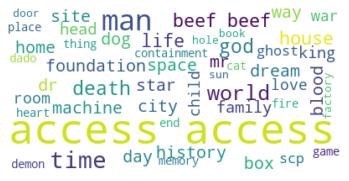

In [66]:
create_wordcloud(nouns_as_str) # likely need to remove access denied!

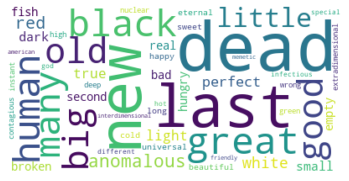

In [67]:
create_wordcloud(adjectives_as_str)

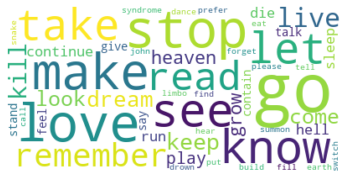

In [68]:
create_wordcloud(verbs_as_str)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


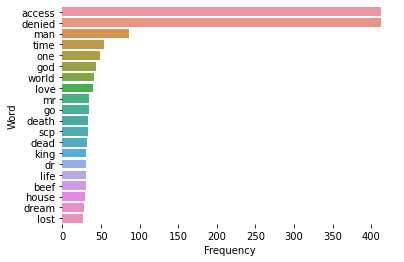

In [69]:
plot_most_common(get_most_common(titles_nostopwords_single_str))